# 1. Introduction

## 1.1 Goal

The goal is to identify the impact of the Covid-19 pandemic globally within the first six months of 2020. I am interested in finding out the most impacted countries and WHO region as well as the how deadly the virus was.

## 1.2 Method Overview

Discover statistics of each countries Covid-19 infection rate and impact from Covid-19 dataset from Kaggle, using the following steps:

    1. Got a general idea of the underlying data through basic exploration steps.
    2. Dealt with unnecessary data and set the index to date.
    3. Carried out exploratory data analysis. Explored the spread of the infection over time (months) and per country.
    4. Used matplotlib and seaborn to visualise the data.

## 1.3 Description of the data

Data extracted from the 'full-grouped.csv' from Kaggle, which stores the daily statistics of Covid-19 for each country and contains the following columns:

    'Date' - The everyday date from January to July
    'Country/Region' - Country name
    'Confirmed' - Confirmed covid-19 cases per day
    'Deaths' - Overall Covid related deaths so far
    'Recovered' - Overall recoveries from Covid
    'Active' - Active Covid cases
    'New cases' - New covid cases confirmed that day
    'New deaths' - New covid related deaths confirmed that day
    'New recovered' - Recoveries from Covid on that day
    'WHO region' - WHO region

## 1.5 Packages Used

In [107]:
 %pylab
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Using matplotlib backend: TkAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 2. General Overview of Data

In [109]:
daily_data = pd.read_csv("full_grouped.csv", parse_dates=['Date'])

In [34]:
daily_data

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [25]:
daily_data.shape

(35156, 10)

In [26]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


# 3. Preprocessing

In [111]:
#Set Date as index

daily_data = daily_data.set_index('Date')

In [112]:
# drop Null values

daily_data = daily_data.dropna()
daily_data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
Date,,,,,,,,,
2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean


# 4. Exploratory Data Analysis

In [113]:
daily_data.Confirmed.sum()

828508482

In [114]:
#10 countries with the highest number of Covid cases 
highest_cases = daily_data.groupby('Country/Region').sum().sort_values(by='Confirmed', ascending=False)[:10]
highest_cases

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Country/Region,,,,,,,
US,224345948,11011411,56353416,156981121,4290258,148011,1325804
Brazil,89524967,3938034,54492873,31094060,2442375,87618,1846641
Russia,45408411,619385,25120448,19668578,816680,13334,602249
India,40883464,1111831,23783720,15987913,1480073,33408,951166
Spain,27404045,3033030,15093583,9277432,282827,28432,150376
United Kingdom,26748587,3997775,126217,22624595,301708,45844,1437
Italy,26745145,3707717,15673910,7363518,246434,35112,198593
France,21210926,3048524,7182115,10980287,226920,30212,81212
Germany,21059152,871322,17107839,3079991,207112,9125,190314


Text(0.5, 1.0, 'Top 10 countries with the highest confirmed Covid cases')

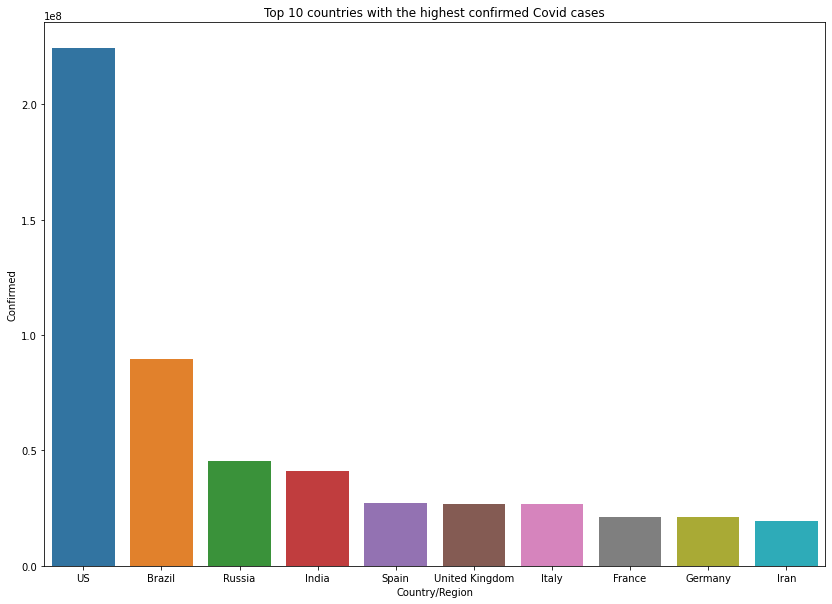

In [89]:
plt.figure(figsize=(14,10))
sns.barplot(x = highest_cases.index, y = highest_cases['Confirmed'])
plt.title("Top 10 countries with the highest confirmed Covid cases")

In [115]:
#No. of covid deaths per country
highest_deaths = daily_data.groupby('Country/Region').sum().sort_values(by='Deaths', ascending=False)[:10]
highest_deaths

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Country/Region,,,,,,,
US,224345948,11011411,56353416,156981121,4290258,148011,1325804
United Kingdom,26748587,3997775,126217,22624595,301708,45844,1437
Brazil,89524967,3938034,54492873,31094060,2442375,87618,1846641
Italy,26745145,3707717,15673910,7363518,246434,35112,198593
France,21210926,3048524,7182115,10980287,226920,30212,81212
Spain,27404045,3033030,15093583,9277432,282827,28432,150376
Mexico,14946202,1728277,11141225,2076700,395489,44022,303810
India,40883464,1111831,23783720,15987913,1480073,33408,951166
Iran,19339267,1024136,15200895,3114236,293606,15912,255144


Text(0.5, 1.0, 'Top 10 countries with the highest Covid related deaths')

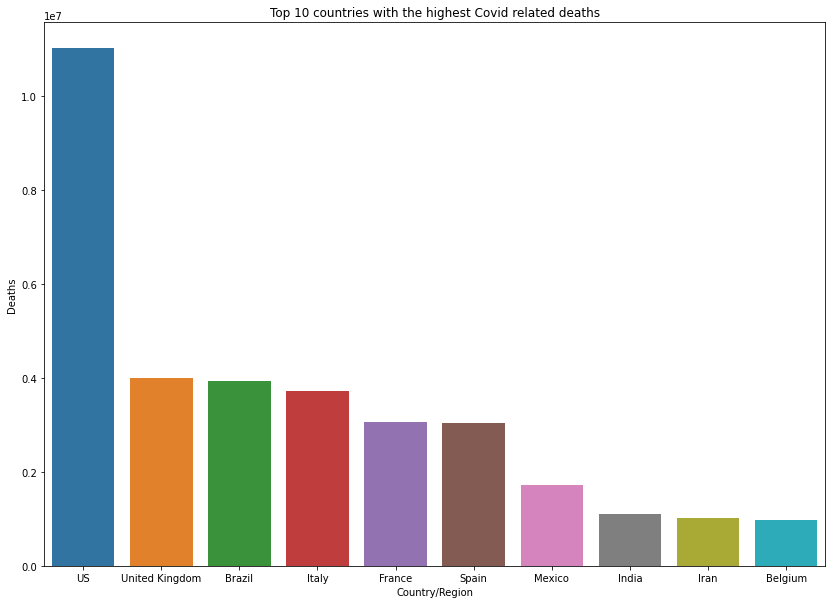

In [116]:
plt.figure(figsize=(14,10))
sns.barplot(x = highest_deaths.index, y = highest_deaths['Deaths'])
plt.title("Top 10 countries with the highest Covid related deaths")

In [117]:
#covid cases per WHO_regions

WHO_region_cases = daily_data.groupby('WHO Region').Confirmed.sum()
WHO_region_cases

WHO Region
Africa                    21791827
Americas                 402261194
Eastern Mediterranean     74082892
Europe                   248879793
South-East Asia           55118365
Western Pacific           26374411
Name: Confirmed, dtype: int64

Text(0.5, 1.0, 'Covid cases per WHO region')

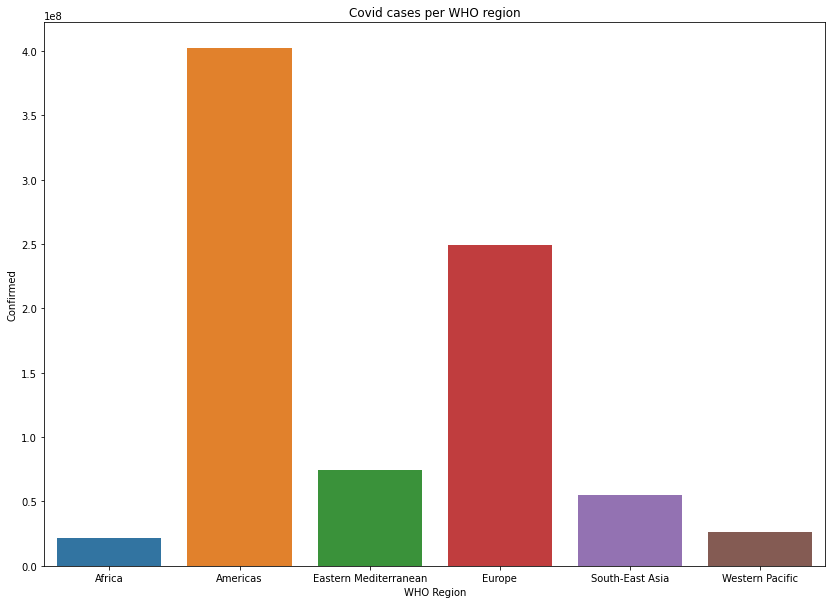

In [118]:
plt.figure(figsize=(14,10))
sns.barplot(x = WHO_region_cases.index, y = WHO_region_cases )
plt.title("Covid cases per WHO region")

In [119]:
#covid deaths per WHO_regions

WHO_region_deaths = daily_data.groupby('WHO Region').Deaths.sum()
WHO_region_deaths

WHO Region
Africa                     439978
Americas                 19359292
Eastern Mediterranean     1924029
Europe                   19271040
South-East Asia           1458134
Western Pacific            932430
Name: Deaths, dtype: int64

<AxesSubplot:xlabel='WHO Region', ylabel='Deaths'>

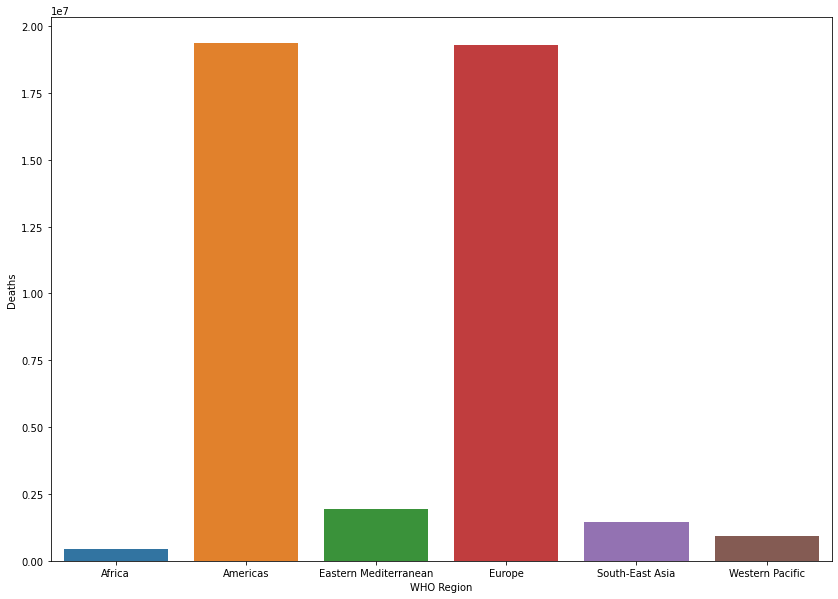

In [219]:
plt.figure(figsize=(14,10))
sns.barplot(x = WHO_region_deaths.index, y = WHO_region_deaths )
#plt.title("Covid deaths per WHO region")

<AxesSubplot:xlabel='Date', ylabel='Confirmed'>

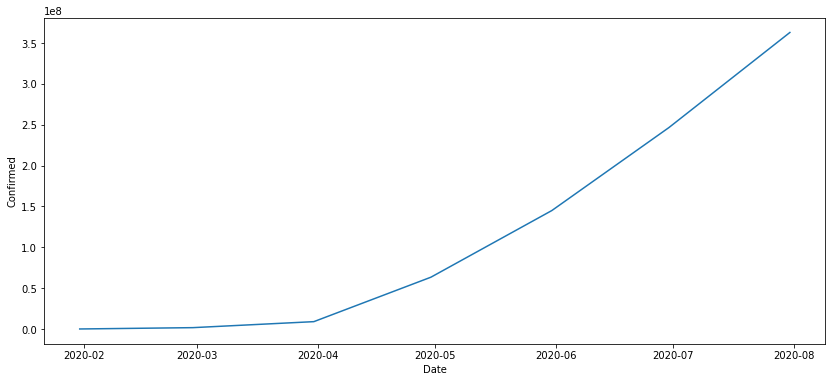

In [222]:
# number of covid cases over time
monthly_data = daily_data['Confirmed'].resample('M').sum()
sns.lineplot(data=monthly_data)

In [209]:
# Percentage of covid recovery rate, death rate and total active cases
def percent(df):
    return df.apply(lambda x: (x / daily_data['Confirmed'].sum()) * 100)

sum_data = daily_data[['Deaths', 'Active', 'Recovered']].sum()
pie_data = percent(sum_data)

pie_data

Deaths        5.236507
Active       47.883076
Recovered    46.880417
dtype: float64

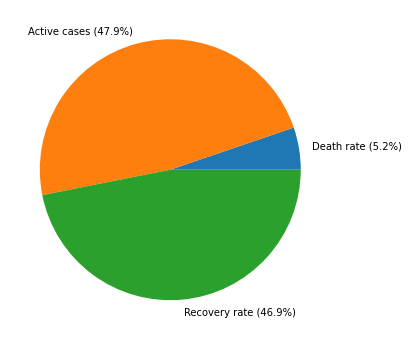

In [207]:
labels = ['Death rate (5.2%)', 'Active cases (47.9%)', 'Recovery rate (46.9%)' ]

plt.pie(pie_data, labels = labels)
plt.show()

Summary: 

1. The US has had the highest number of Covid cases as well as covid related deaths out of all the countries.

2. Out of all the WHO regions, the Americas have the been impacted the most by the Covid-19 pandemic in terms of infections and deaths; followed by Europe which, although had a much lower infection rate than the Americas, almost matched the Americas in death rate.

3. Covid numbers had a slow and steady rise up until the month of April 2020 when Covid numbers began to grow exponentially.

4. Although there were more than 800 million infections globally, the death rate is about 5% with a much higher recovery rate of about 47%.
